## Лабораторная работа №2

### Цель

Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на основе данных об отражении сигналов радара от поверхностей. 60 входных значений показывают силу отражаемого сигнала под определенным углом.Входные данные нормализованы и находятся в промежутке от 0 до 1.

### Задачи

1. Ознакомиться с задачей бинарной классификации
2. Загрузить данные
3. Создать модель ИНС в tf.Keras
4. Настроить параметры обучения
5. Обучить и оценить модель
6. Изменить модель и провести сравнение. Объяснить результаты

## Выполнение работы

In [1]:
import pandas
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
plt.style.use('seaborn-whitegrid')

Набор данных загружается напрямую с помощью pandas. Затем необходимо разделить
атрибуты (столбцы) на 60 входных параметров (X) и 1 выходной (Y).

In [2]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
print(X)

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]


Выходные параметры представлены строками (“R” и “M”), которые необходимо перевести
в целочисленные значения 0 и 1 соответственно. Для этого применяется LabelEncoder из
scikit-learn.

In [3]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

Теперь можно задать базовую архитектуру сети.

In [4]:
model = Sequential()
model.add(Dense(60, input_dim = 60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1,  kernel_initializer='normal', activation='sigmoid'))

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. функцию потерь, которая определяет, как сеть должна оценивать качество своей
работы на обучающих данных и, соответственно, как корректировать ее в
правильном направлении; Для задач бинарной классификации применяется
функция binary crossentropy.
2. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь
на наблюдаемые данные и функцию потерь;
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет
интересовать только точность (доля правильно классифицированных
изображений).

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие
данные.

In [6]:
f1 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1,verbose=0)

В процессе обучения отображаются четыре величины: потери сети на обучающих данных
и точность сети на обучающих данных, а также потери и точность на данных, не
участвовавших в обучении.
В представленном наборе данных присутствует некоторая избыточность, т.к. с разных
углов описывается один и тот же сигнал. Вероятно, что некоторые углы отражения сигнала
имеют большую значимость, чем другие. Изменение количества нейронов во входном слое
напрямую влияет на количество признаков, с которыми будет работать нейронная сеть.
 1. Необходимо уменьшить размер входного слоя в два раза и сравнить с результатами первоначальной архитектуры.
 
Нейронная сеть с несколькими слоями позволяет находить закономерности не только во
входных данных, но и в их комбинации. Также, дополнительные слои позволяют ввести
нелинейность в сеть, что позволяет получать более высокую точность.

2. Необходимо добавить промежуточный (скрытый) слой Dense в архитектуру сети с
15 нейронами и проанализировать результаты.

## Требования
1. Изучить влияние кол-ва нейронов на слое на результат обучения модели.
2. Изучить влияние кол-ва слоев на результат обучения модели
3. Построить графики ошибки и точности в ходе обучения
4. Провести сравнение полученных сетей, объяснить результат

### Выполнение
Создадим ещё 2 модели, и изменим их арихтектуру сети.

In [7]:
model_two = Sequential()
model_two.add(Dense(30, input_dim = 60, kernel_initializer='normal', activation='relu'))
model_two.add(Dense(1,  kernel_initializer='normal', activation='sigmoid'))

model_two.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

f2 = model_two.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1,verbose=0)

model_three = Sequential()
model_three.add(Dense(30, input_dim = 60, kernel_initializer='normal', activation='relu'))
model_three.add(Dense(15, kernel_initializer='normal', activation='tanh'))
model_three.add(Dense(1,  kernel_initializer='normal', activation='sigmoid'))

model_three.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

f3 = model_three.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1,verbose=0)

Построим графики, чтобы наглядно увидеть разницу между моделями.

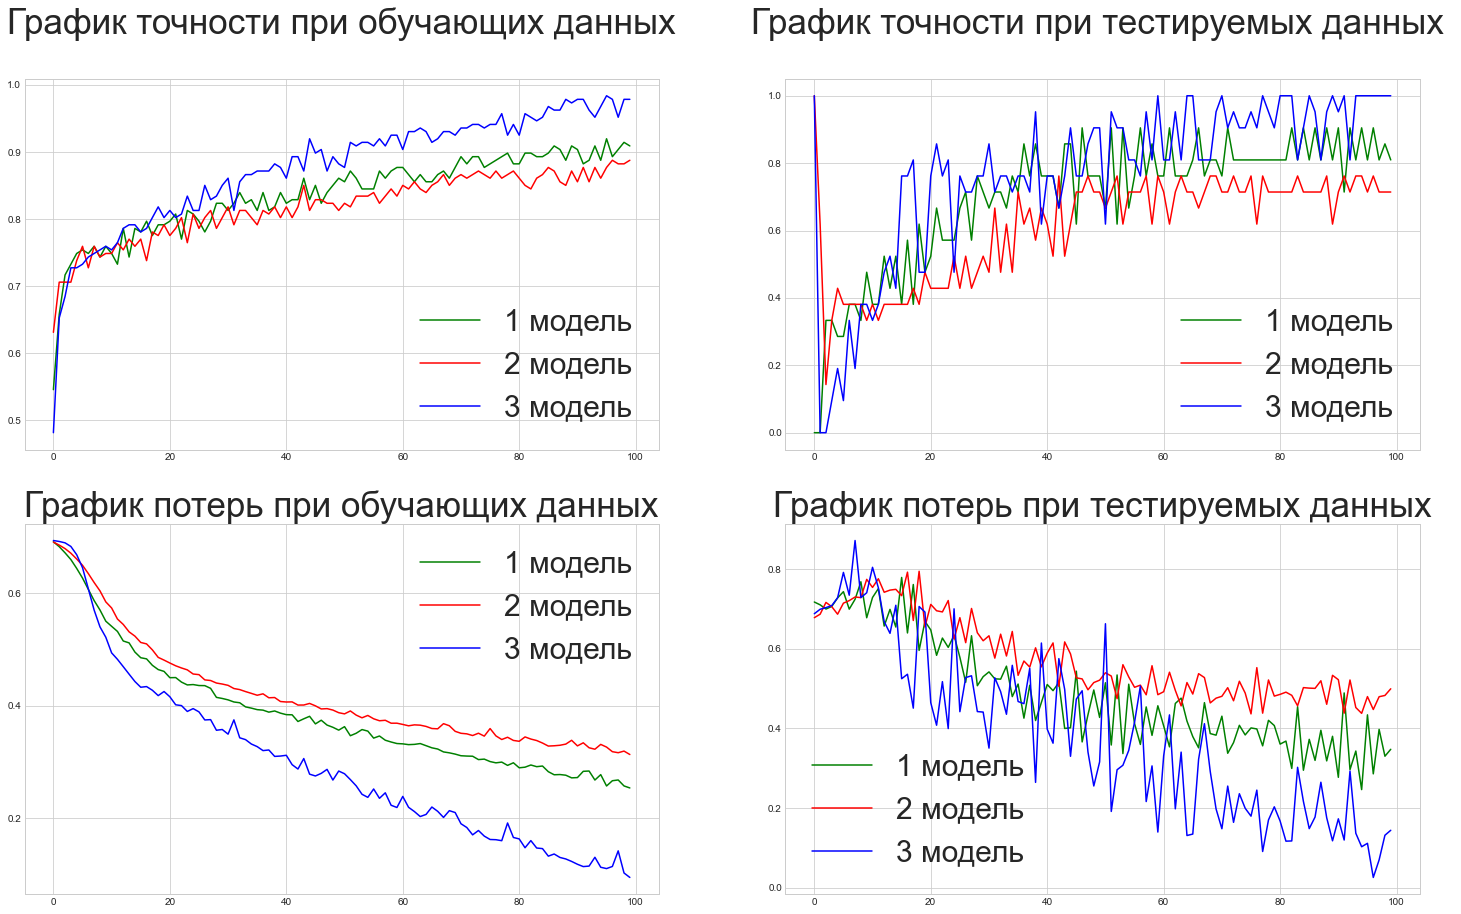

In [8]:
fig, axes = plt.subplots(2,2,figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
axes[0,0].plot(f1.history['accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,0].plot(f2.history['accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,0].plot(f3.history['accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,0].set_title('График точности при обучающих данных\n',fontsize=35)
axes[0,0].legend(loc='best')

axes[0,1].plot(f1.history['val_accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,1].plot(f2.history['val_accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,1].plot(f3.history['val_accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,1].legend(loc='best')
axes[0,1].set_title('График точности при тестируемых данных \n',fontsize=35)

axes[1,0].plot(f1.history['loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,0].plot(f2.history['loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,0].plot(f3.history['loss'],color=('blue'),linewidth=1.5,label='3 модель')
axes[1,0].set_title('График потерь при обучающих данных',fontsize=35)
axes[1,0].legend(loc='best')

axes[1,1].plot(f1.history['val_loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,1].plot(f2.history['val_loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,1].plot(f3.history['val_loss'],color=('blue'),linewidth=1.5,label='3 модель')

axes[1,1].set_title('График потерь при тестируемых данных',fontsize=35)
axes[1,1].legend(loc='best')

## Вывод
Лучше всего себя проявила модель 3, приблизившись по точности к единице, и опустившись по потерям ниже 0,2. Модель 2 проявила себя хуже остальных. Из этого можно сделать вывод, что уменьшая число нейронов во входном слое, модель становится качественно хуже, а введение дополнительных слоев позволяет повысить точность и сократить потери.

In [9]:
model_four = Sequential()
model_four.add(Dense(60, input_dim = 60, kernel_initializer='normal', activation='relu'))
model_four.add(Dense(30, kernel_initializer='normal', activation='tanh'))
model_four.add(Dense(15, kernel_initializer='normal', activation='tanh'))
model_four.add(Dense(1,  kernel_initializer='normal', activation='sigmoid'))

model_four.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

f4 = model_four.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1,verbose=0)

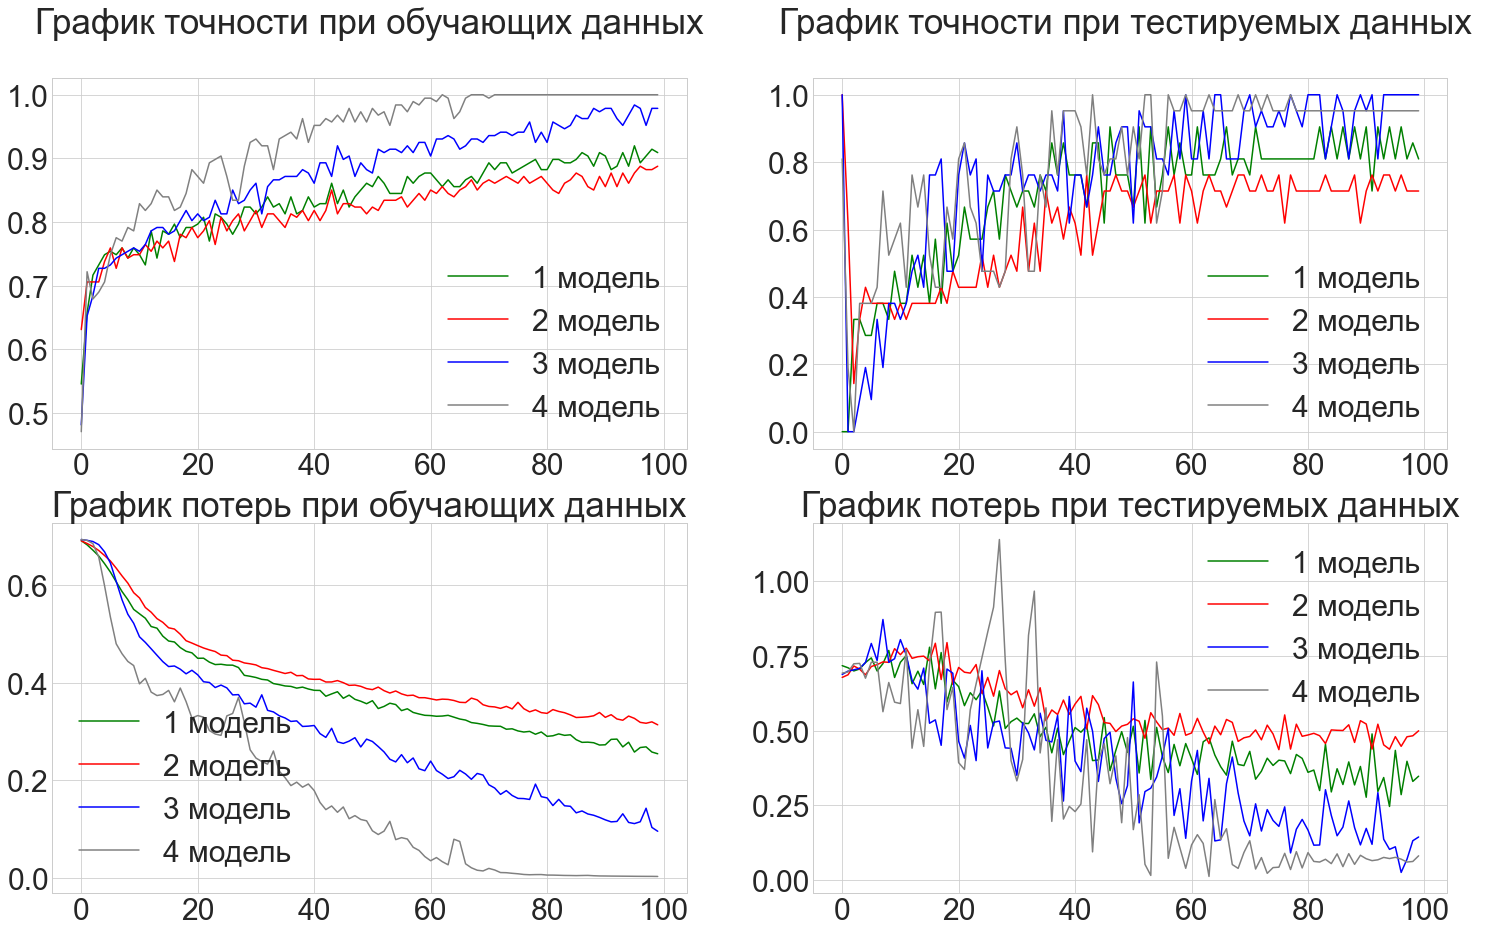

In [10]:
fig, axes = plt.subplots(2,2,figsize=(25, 15))
plt.rcParams.update({'font.size': 30})
axes[0,0].plot(f1.history['accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,0].plot(f2.history['accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,0].plot(f3.history['accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,0].plot(f4.history['accuracy'],color=('gray'),linewidth=1.5,label='4 модель')
axes[0,0].set_title('График точности при обучающих данных\n',fontsize=35)
axes[0,0].legend(loc='best')

axes[0,1].plot(f1.history['val_accuracy'],color=('green'),linewidth=1.5,label='1 модель')
axes[0,1].plot(f2.history['val_accuracy'],color=('red'),linewidth=1.5,label='2 модель')
axes[0,1].plot(f3.history['val_accuracy'],color=('blue'),linewidth=1.5,label='3 модель')
axes[0,1].plot(f4.history['val_accuracy'],color=('gray'),linewidth=1.5,label='4 модель')
axes[0,1].legend(loc='best')
axes[0,1].set_title('График точности при тестируемых данных \n',fontsize=35)

axes[1,0].plot(f1.history['loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,0].plot(f2.history['loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,0].plot(f3.history['loss'],color=('blue'),linewidth=1.5,label='3 модель')
axes[1,0].plot(f4.history['loss'],color=('gray'),linewidth=1.5,label='4 модель')
axes[1,0].set_title('График потерь при обучающих данных',fontsize=35)
axes[1,0].legend(loc='best')

axes[1,1].plot(f1.history['val_loss'],color=('green'),linewidth=1.5,label='1 модель')
axes[1,1].plot(f2.history['val_loss'],color=('red'),linewidth=1.5,label='2 модель')
axes[1,1].plot(f3.history['val_loss'],color=('blue'),linewidth=1.5,label='3 модель')
axes[1,1].plot(f4.history['val_loss'],color=('gray'),linewidth=1.5,label='4 модель')

axes[1,1].set_title('График потерь при тестируемых данных',fontsize=35)
axes[1,1].legend(loc='best')